# ALY 6140 Group Project- New York Government's Jobs Analysis
Group 5

Zexi Zhang, 
Xueyi Wang, 
Xiaoyun Zhao& 
Buhe Li 



## Project Preview:
   the datasets taken are provided by City of New York’s official jobs site from 2011 to 2020. It mainly contains the agency, career level, job title, salary, posting date, etc. Details like career level, no matter where you are in your career, job offerings are divided into five levels, such as entry level, experienced, manager, tec. In addition, the data types are mainly categorical,For this dataset, before we do any data exploration, we create one new column “the average salary”, the focus will be what is the prediction of average salary for different levels of career. This can be broken down into two small parts: distribution of jobs posted at each career level, and the average salary status at each career level, from which, we will provide five different job search strategies for each career level job, which takes into account two perspective of the number of job position and salary. All the questions will be answered starting from the visualization and descriptive analysis. Furthermore, we will forecast the total average salary by modeling.

## Step One: Import and install package 

##### Package Installation 
The Project have used the sodapy package to script the data from NYC Open Data.
pandas and numpy are for data operation
matplotlib and seaborn are for graphes. 
Sklearn package is for predictive analysis.

In [1]:
!pip install sodapy
!pip install sklearn
!pip install pandas
!pip install matplotlib
!pip install seaborn


#### Import Package

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, f_regression, chi2, SelectKBest, SelectPercentile, SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
import pandas as pd
from sodapy import Socrata
from sklearn import tree
from Group_5_Module import *

## Step Two: API Data

###### Get the Jobs' data From NYC open data by using API
The dataset has 2894 records from 2011 unitl 2020 Jan. 
From the data we can see that, all of the data columns are objective type of data. However, we have numarical data type. We will process the issue in cleaning part. The missing value issue will also be sovled in cleaning part. 


In [2]:
data = datafrom()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 29 columns):
additional_information           1851 non-null object
agency                           2894 non-null object
business_title                   2894 non-null object
career_level                     2892 non-null object
civil_service_title              2894 non-null object
division_work_unit               2894 non-null object
full_time_part_time_indicator    2701 non-null object
hours_shift                      887 non-null object
job_category                     2892 non-null object
job_description                  2894 non-null object
job_id                           2894 non-null object
level                            2894 non-null object
minimum_qual_requirements        2882 non-null object
number_of_positions              2894 non-null object
post_until                       928 non-null object
posting_date                     2894 non-null object
posting_type                   

,additional_information,agency,business_title,career_level,civil_service_title,division_work_unit,full_time_part_time_indicator,hours_shift,job_category,job_description,...,process_date,residency_requirement,salary_frequency,salary_range_from,salary_range_to,title_classification,title_code_no,to_apply,work_location,work_location_1
0,"Salary range for this position is: $42,405 - $...",DEPARTMENT OF BUSINESS SERV.,Account Manager,NaN,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,NaN,NaN,NaN,Division of Economic & Financial Opportunity (...,...,2020-01-28T00:00:00.000,New York City residency is generally required ...,Annual,42405,65485,Competitive-1,40563,NaN,110 William St. N Y,NaN
1,NaN,DEPARTMENT OF BUSINESS SERV.,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",NaN,ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,F,NaN,NaN,The New York City Department of Small Business...,...,2020-01-28T00:00:00.000,New York City residency is generally required ...,Annual,60740,162014,Competitive-1,10009,"In addition to applying through this website, ...",110 William St. N Y,NaN
2,1. A Motor Vehicle Driverâ€™s License valid i...,NYC HOUSING AUTHORITY,Maintenance Worker - Technical Services-Heatin...,Experienced (non-manager),MAINTENANCE WORKER,Management Services Department,F,NaN,Maintenance & Operations,"Under direct supervision, assist in the routin...",...,2020-01-28T00:00:00.000,NYCHA has no residency requirements.,Annual,51907.68,54580.32,Competitive-1,90698,"Click the ""Apply Now"" button.",Heating Mgt-Operations,NaN
3,1. A Motor Vehicle Driverâ€™s License valid i...,NYC HOUSING AUTHORITY,Maintenance Worker - Technical Services-Heatin...,Experienced (non-manager),MAINTENANCE WORKER,Management Services Department,F,NaN,Maintenance & Operations,"Under direct supervision, assist in the routin...",...,2020-01-28T00:00:00.000,NYCHA has no residency requirements.,Annual,51907.68,54580.32,Competitive-1,90698,"Click the ""Apply Now"" button.",Heating Mgt-Operations,NaN
4,SPECIAL NOTE: 1. This is a temporary assig...,NYC HOUSING AUTHORITY,Temporary Painter,Entry-Level,PAINTER,Dept of Management & Planning,F,NaN,Maintenance & Operations,Responsibilities of selected candidates will i...,...,2020-01-28T00:00:00.000,NYCHA has no residency requirement.,Hourly,35,35,Competitive-1,91830,"Click the ""Apply Now"" button.",DMP-Contract & Analysis Unit,NaN


## Step Three: Data Cleaning Process

###### 1.Clean NA data and dropping columns:
From the data describtion, we can see that there are many missing values, however, ,ost of missing values are in the dropping columns.
such as work location and to apply. After dropping columns, we only have 5% missing value in full_time_part_time_indicator. we filled it by using mode.

###### 2.Convert Object type to numrical:
From the data we can see that, all of the data columns are objective type of data. However, we have numarical data type. 

###### 3. Payment Frequency
Converting the monthly and darily pay to annual pay.

In [3]:

data = clean_data(data)

                                   additional_information  \
count                                                1851   
unique                                                671   
top     Appointments are subject to OMB approval. For ...   
freq                                                   92   

                                agency   business_title  \
count                             2894             2894   
unique                              51             1215   
top     DEPT OF ENVIRONMENT PROTECTION  Project Manager   
freq                               676               33   

                     career_level    civil_service_title  \
count                        2892                   2894   
unique                          5                    318   
top     Experienced (non-manager)  COMMUNITY COORDINATOR   
freq                         2048                    181   

          division_work_unit full_time_part_time_indicator hours_shift  \
count                  

D:\anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Step Three: EDA & Descriptive statistics

###### The Average Monthly Posts From 2015 to 2019
This plot is the sum of job positions posted on the New York City Government website, which is from 2013 to 2020. From the plot, we can observe that New York Government job positions are always below 500 numbers from 2013 to 2017. However, it began to increase after 2017 and increased dramatically between 2018 and 2019 which posted over 2000 job positions in a year. This phenomenon shows that government job positions are in great demand due to the economic recovery of America.

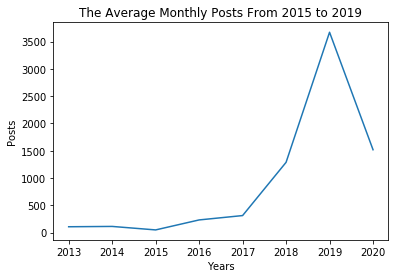

In [4]:
timeserise(data)

###### The distrbution of career levels
This plot is the distribution of career levels counted by the number of positions. The plot indicates that the Experienced (Non-Manager) job required the most positions, which is over 4500 numbers. Nevertheless, the website did post too many Executive level and Student level job positions. Based on the data, the project concludes that the government preferred to hire more experienced people to work with them, but they don’t need a lot of executive people or students for each government department. Therefore, the project suggests that experienced people can pay more attention to government job posts when they are looking for job positions, and executive people or students don’t need to waste too much time on finding a government job.

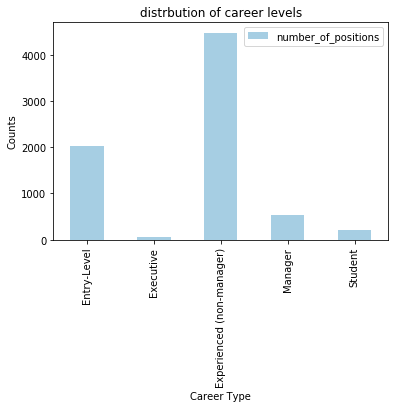

In [5]:
level_dist(data)

###### the demand distribution of career levels and give advice to various job seekers. 

###### 1. Student
Here are the top five agency posts for the student level. Top five agency posts for the student is similar to the positions for entry-level, but in terms of quantity, the number of posts for entry-level is much greater than for student.  Design & Construction and department of the building provides the most positions, and most of them are interns and aides, which are not strictly restricted to the major. Therefore, if you are looking for intern or aides jobs and very eager to get New York City government work, you can apply for these five agencies, which may increase your acceptance rate.

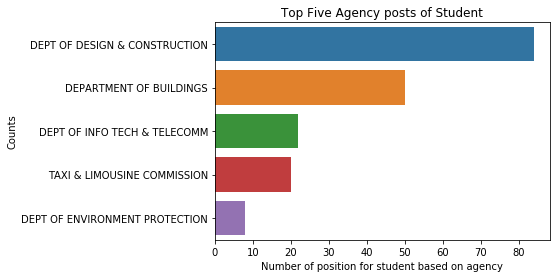

In [6]:
level_s(data)

###### 2.Experienced
Here is the bar chart of the top five agency that has the most number of positions for experienced (non-manager) career level. They are the department of environment protection, NYC housing authority, taxi & limousine commission, department of health/mental hygiene, and admin for children's SVCS. The department of environment protection provides the greatest number of positions for experienced career level, which is double or triple the other agencies. Among these positions, engineers and project managers are in the majority. Thus, if you are experienced and work as engineers and project managers, the more job opportunities you have in these five agencies and particularly in the department of environment protection. 

       number_of_positions
count            46.000000
mean             97.304348
std             173.247013
min               2.000000
25%               8.500000
50%              32.500000
75%              78.000000
max             926.000000


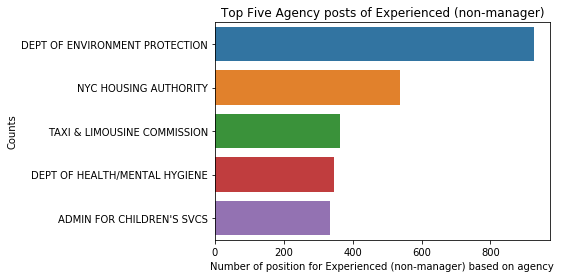

In [7]:
level_experienced(data)

###### Entry-Level
For entry-level, top five agency that has the greatest number of positions are parks & recreation, NYC housing authority, department of environment protection, department of correction and management & budget.  The parks & recreation agency provide the greatest number of positions. Also, most positions for entry-level are labor, such as seasonal city park workers, budget analyst caretakers, and painter. Thus, if you are looking for entry-level positions, these five agencies have more opportunities for you.

       number_of_positions
count            31.000000
mean             65.129032
std             154.748773
min               1.000000
25%               2.000000
50%               8.000000
75%              28.500000
max             600.000000


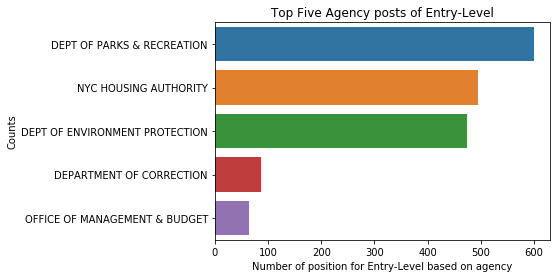

In [8]:
level_entry(data)

###### Manager
In terms of manager level, department of environment protection, NYC housing authority, design & construction, admin for children's SVCS, and office of the comptroller provide the most number of positions. Among these agencies, the number of positions offered by the department of environment protection, NYC housing authority, and design & construction all over fifty. Also, in these positions, administrative engineer and construction project manager are in the majority. Therefore for manager level job hunter and major in engineering and construction project management, we recommend you to apply for these five agencies, which is a greater chance to get the job.

       number_of_positions
count            36.000000
mean             14.555556
std              19.680947
min               1.000000
25%               2.000000
50%               6.500000
75%              17.000000
max              84.000000


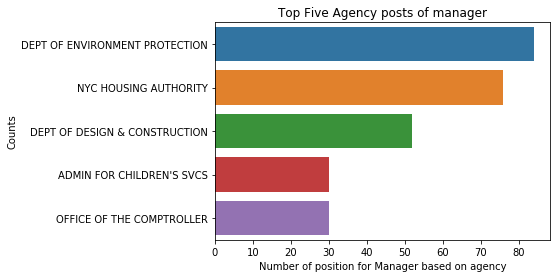

In [9]:
level_manager(data)

###### Executive
As a whole, there is just a small amount of positions for the executive level. In comparison, NYC housing authority and department of environment protection provide more posts. Among these positions, engineering jobs are still the biggest, and Building Operations & Maintenance is a big part of it. Hence, if you are executive talent and want a high success rate, we recommend you to according to your major to apply for positions of NYC housing authority agency and department of the environment protection agency. 

       number_of_positions
count            16.000000
mean              3.500000
std               3.540245
min               1.000000
25%               2.000000
50%               2.000000
75%               4.000000
max              14.000000


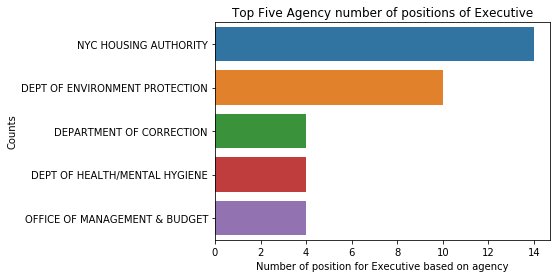

In [10]:
level_exec(data)

###### the Salary of career levels 


###### Entry-Level
In terms of average salary of departments, as we can see from the bar chart above, it is clear that the salary in fire department is much larger than the average salary (the red line represents the average salary of all departments). This insight is useful since if you are looking for entry-level jobs, it is suggested that you should apply for jobs in fire department, which takes into account salary. Also, from the overall view, the salary of the top five departments are all larger than the average salary, which is a positive message for people applying entry-level job, because this might be the implication that entry-level jobs have a not bad wage structure, in other words, there is no case where the salary of a certain department is extremely high, which affects the average salary. 

Therefore, combined with the top five agency owning the largest employment opportunities, we can’t find the same department, from which, our suggestion for entry level job is that people should make different job apply plans based on different needs (salary or opportunity).


       average_salary
count      302.000000
mean     53849.876109
std      15615.137047
min      30127.500000
25%      43557.187500
50%      51466.250000
75%      58573.500000
max     131392.500000


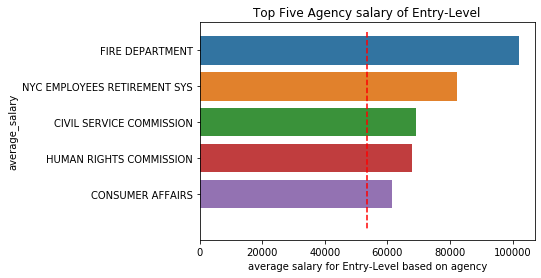

In [11]:
s_ent(data)

###### student
The bar chart of top five agency salary of student has the unbalanced salary structure, only the average salary of the department of admin for children’s svcs is higher than the total average salary, which means the total average salary is not accurate because the salary in admin for children’s svcs drastically increase the average salary. This is a reminder for job seeker that if they want to look for student level job, there is important point that the actual average salary for student level job should be far less than the theoretical average of almost 35,000. Additionally, combined with the bar chart of top five agency post of student, we can find two common departments: info tech & telecom and building, which means there are two departments, both with high wages and many posts, for student level job.

Therefore, for applicants of student job, our suggestion is that people should give priority to departments of info tech & telecom and building.


                                average_salary
agency                                        
ADMIN FOR CHILDREN'S SVCS             56986.50
DEPT OF INFO TECH & TELECOMM          35314.50
OFFICE OF MANAGEMENT & BUDGET         34758.75
DEPARTMENT OF BUILDINGS               34515.00
DEPT OF CITYWIDE ADMIN SVCS           34515.00
DEPT OF HEALTH/MENTAL HYGIENE         34515.00
DEPARTMENT OF CITY PLANNING           34125.00
TAXI & LIMOUSINE COMMISSION           32955.00
ADMIN TRIALS AND HEARINGS             31980.00
DEPT OF DESIGN & CONSTRUCTION         31687.50
TEACHERS RETIREMENT SYSTEM            31687.50
DEPT OF ENVIRONMENT PROTECTION        31200.00
DEPARTMENT FOR THE AGING              30225.00
OFFICE OF COLLECTIVE BARGAININ        18632.25
       average_salary
count       14.000000
mean     33792.642857
std       7869.210882
min      18632.250000
25%      31687.500000
50%      33540.000000
75%      34515.000000
max      56986.500000


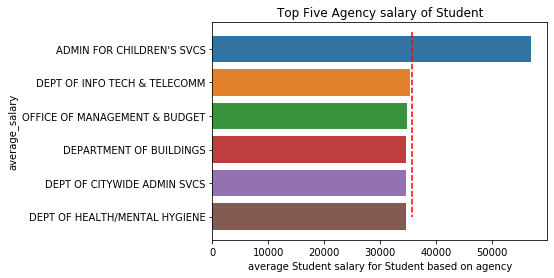

In [12]:
s_student(data)

###### Manager
From the bar chart of average salary of manager, we can see it has the pattern similar to the bar chart of salary of entry-level. One difference, however, is that the law department is much larger than the average salary, instead of fire department, which makes sense because the law department is really hot today and requires high education, in other words, if you are looking for high-paying manager jobs, law department can be your first choice.

Therefore, considering the two factors of opportunity and salary can be concluded that jobs with more open positions tend to be lower paid. Our advice for manager job is that people should develop application strategies based on different needs. Also, they can learn some legal knowledge on their own for a better salary.


       average_salary
count       36.000000
mean    103225.574603
std      21098.712823
min      67970.000000
25%      92107.131250
50%     103286.201299
75%     113944.216518
max     178047.333333


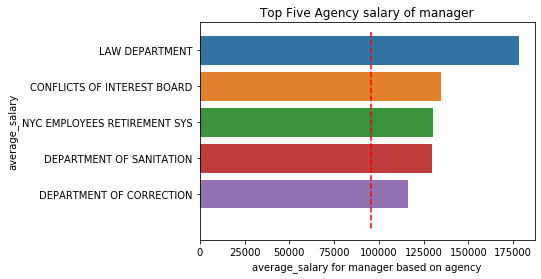

In [13]:
s_manager(data)

###### Experienced
The bar chart “top five agency salary of experienced” shows that it’s pattern similar to that of “top five agency salary of executive”, which means both have awesome wage structure, indicating the gap in high pay for such jobs will not be particularly large. Also, based on both analysis of post and salary, there are no intersections between departments with the top five posts and departments with the top five salary. Therefore, for experienced job, depending on the degree of demand for salary and admission probability, people should make their own plan according to bar charts.


       average_salary
count       46.000000
mean     70859.748516
std      12431.000835
min      42991.750000
25%      62082.584097
50%      69522.703986
75%      79310.495956
max     100000.000000


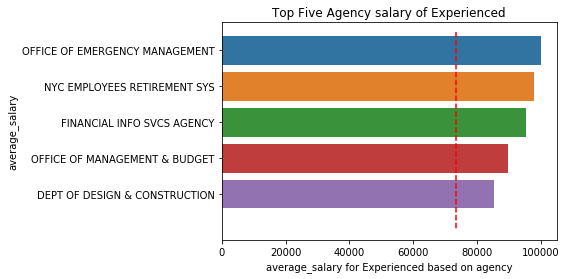

In [14]:
s_exp(data)

###### Executive
As can been seen from the bar chart above, the salary of all departments is larger than the average salary, but no one is extremely larger. This is important because it shows that experienced and manager jobs have a very good wage structure, which means it is relatively easy for people to look for this type of job with satisfactory pay. Furthermore, combined with the bar chart of top five agency post of executive, we are able to find three common departments: NYC housing authority, office of management & budget and environment protection.

Therefore, for applicants of executive job, your application strategy is to give priority to departments of NYC housing authority, office of management & budget and environment protection because jobs in those three tend to be well paid and high desirable.


       average_salary
count       16.000000
mean    132809.598214
std      27602.178707
min      93495.000000
25%     114867.000000
50%     130422.500000
75%     160568.142857
max     180000.000000


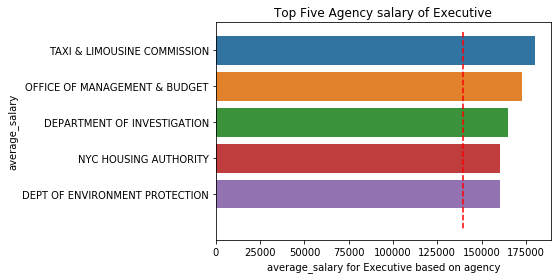

In [15]:
s_exe(data)

In [16]:
data_final=model_feature(data)
data_final.head()

count      2892.000000
mean      76750.223109
std       26707.903237
min       18632.250000
25%       58157.500000
50%       71833.250000
75%       91939.520000
max      209585.000000
Name: average_salary, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 82 columns):
agency_ADMIN FOR CHILDREN'S SVCS                 2892 non-null uint8
agency_ADMIN TRIALS AND HEARINGS                 2892 non-null uint8
agency_BOARD OF CORRECTION                       2892 non-null uint8
agency_BOROUGH PRESIDENT-QUEENS                  2892 non-null uint8
agency_BUSINESS INTEGRITY COMMISSION             2892 non-null uint8
agency_CIVIL SERVICE COMMISSION                  2892 non-null uint8
agency_CIVILIAN COMPLAINT REVIEW BD              2892 non-null uint8
agency_CONFLICTS OF INTEREST BOARD               2892 non-null uint8
agency_CONSUMER AFFAIRS                          2892 non-null uint8
agency_DEPARTMENT FOR THE AGING                  28

,agency_ADMIN FOR CHILDREN'S SVCS,agency_ADMIN TRIALS AND HEARINGS,agency_BOARD OF CORRECTION,agency_BOROUGH PRESIDENT-QUEENS,agency_BUSINESS INTEGRITY COMMISSION,agency_CIVIL SERVICE COMMISSION,agency_CIVILIAN COMPLAINT REVIEW BD,agency_CONFLICTS OF INTEREST BOARD,agency_CONSUMER AFFAIRS,agency_DEPARTMENT FOR THE AGING,...,level_M1,level_M2,level_M3,level_M4,level_M5,level_M6,level_M7,level_M8,number_of_positions,labled_salary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,50.0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1


## Step Four: Train and test sets

Preprocess the dataset fro the modeling.
We seprate the data to 4 parts x_train,x_test,y_train,y_test, train data have 80% of total data, test data have 20% of total data. 

In [17]:
x_train,x_test,y_train,y_test=x_y(data_final)

## Step Five: Feature Selection and Prediction

###### 1.Using F-score to select feature
From the graph below, we can see that when the number of features is 75% of the total features, we may have the best selection. 


###### 2.Training data with Desision Tree Model
We evaluated the model by using test set, the accuracy is close to 75%


###### 3.Training data with Random Forest 
We set up estimators to 500, and the max depth is 50, The accuracy is also close to 75%


D:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 5 79] are constant.
  UserWarning)
D:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 5 79] are constant.
  UserWarning)
D:\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


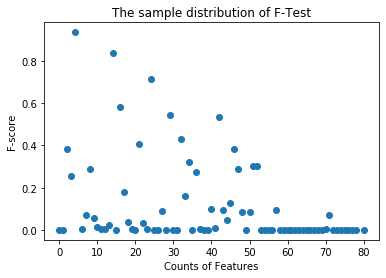

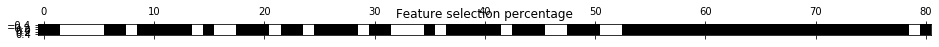

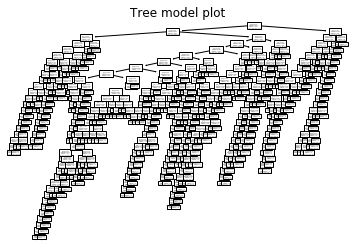

Decision Tree Classifier Accuracy - 73.92055267702936%
Random Forest Accuracy - 74.78411053540587%


In [18]:
train_test(x_train,x_test,y_train,y_test)